In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\DELL\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DELL\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DELL\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\DELL\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [6]:
epochs_count = 100
batch_size = 32

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences= True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = "adam", loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = epochs_count, batch_size=batch_size)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
1975/1975 [==============================] - 17s 9ms/step - loss: 0.0132
Epoch 2/100
1975/1975 [==============================] - 13s 7ms/step - loss: 0.0031
Epoch 3/100
1975/1975 [==============================] - 14s 7ms/step - loss: 0.0028
Epoch 4/100
1975/1975 [==============================] - 14s 7ms/step - loss: 0.0023
Epoch 5/100
1975/1975 [==============================] - 14s 7ms/step - loss: 0.0023
Epoch 6/100
1975/1975 [==============================] - 15s 7ms/step - loss: 0.0027
Epoch 7/100
1975/1975 [==============================] - 15s 8ms/step - loss: 0.0019
Epoch 8/100
1975/1975 [==============================] - 14s 7ms/step - loss: 0.0021
Epoch 9/100
1975/1975 [==============================] - 14s 7ms/step - loss: 0.0022
Epoch 10/100
1975/19

1975/1975 [==============================] - 17s 9ms/step - loss: 7.0258e-04
Epoch 74/100
1975/1975 [==============================] - 17s 8ms/step - loss: 7.3896e-04
Epoch 75/100
1975/1975 [==============================] - 17s 8ms/step - loss: 6.1908e-04
Epoch 76/100
1975/1975 [==============================] - 17s 9ms/step - loss: 7.3595e-04
Epoch 77/100
1975/1975 [==============================] - 17s 9ms/step - loss: 6.3792e-04
Epoch 78/100
1975/1975 [==============================] - 17s 9ms/step - loss: 8.1743e-04
Epoch 79/100
1975/1975 [==============================] - 17s 9ms/step - loss: 6.4235e-04
Epoch 80/100
1975/1975 [==============================] - 17s 9ms/step - loss: 6.6778e-04
Epoch 81/100
1975/1975 [==============================] - 17s 9ms/step - loss: 8.2559e-04
Epoch 82/100
1975/1975 [==============================] - 18s 9ms/step - loss: 7.0391e-04
Epoch 83/100
1975/1975 [==============================] - 17s 9ms/step - loss: 6.2159e-04
Epoch 84/100
1975/1975 

In [7]:
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [8]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

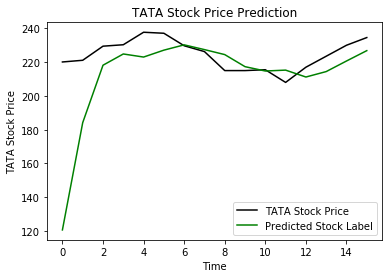

In [9]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label ='Predicted Stock Label')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show() 